<a href="https://colab.research.google.com/github/A-varshith/NLP_LAB/blob/main/NLP_LAB10_2403A52024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 10.4: Visualizing Word Embeddings using t-SNE  


## STEP 1 — Install Required Libraries (Colab)

In [1]:

!pip install gensim --quiet
!pip install scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 40.8 MB/s eta 0:00:00



## STEP 2 — Import Libraries

- gensim → load embeddings  
- numpy → matrix handling  
- matplotlib → visualization  
- sklearn.manifold.TSNE → dimensionality reduction  


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE


## STEP 3 — Download Pre-trained Word2Vec Model

In [3]:

!wget -c https://github.com/mmihaltz/word2vec-GoogleNews-vectors/raw/master/GoogleNews-vectors-negative300.bin.gz


--2026-02-12 05:02:23--  https://github.com/mmihaltz/word2vec-GoogleNews-vectors/raw/master/GoogleNews-vectors-negative300.bin.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/mmihaltz/word2vec-GoogleNews-vectors/master/GoogleNews-vectors-negative300.bin.gz [following]
--2026-02-12 05:02:24--  https://media.githubusercontent.com/media/mmihaltz/word2vec-GoogleNews-vectors/master/GoogleNews-vectors-negative300.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 

In [4]:

print("Loading model...")
model = KeyedVectors.load_word2vec_format(
    "GoogleNews-vectors-negative300.bin.gz", binary=True
)
print("Model Loaded!")
print("Vocabulary Size:", len(model.key_to_index))
print("Example vector (king):", model["king"][:10])


Loading model...
Model Loaded!
Vocabulary Size: 3000000
Example vector (king): [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


## STEP 4 — Select 40 Words

In [5]:

words = [
    "king","queen","prince","princess","monarch","throne",
    "india","china","france","germany","paris","delhi","london","beijing",
    "dog","cat","lion","tiger","elephant","horse","wolf","fox",
    "computer","laptop","phone","internet","software","hardware","technology","ai",
    "doctor","nurse","teacher","engineer","lawyer","scientist","student","professor"
]

vectors = np.array([model[word] for word in words])
print("Total words:", len(words))


Total words: 38


## STEP 5 — Apply t-SNE Reduction

In [6]:

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced = tsne.fit_transform(vectors)
print("t-SNE complete.")


t-SNE complete.


## STEP 6 — Plot Visualization

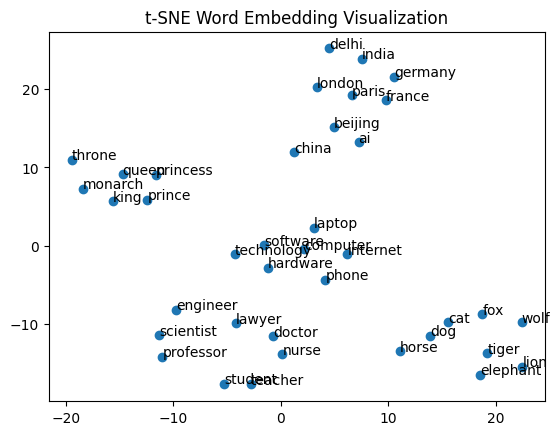

In [7]:

plt.figure()
plt.scatter(reduced[:,0], reduced[:,1])

for i, word in enumerate(words):
    plt.text(reduced[i,0], reduced[i,1], word)

plt.title("t-SNE Word Embedding Visualization")
plt.show()



## STEP 7 — Interpretation

Similar words form clusters (animals, countries, royalty, etc.).
t-SNE preserves local similarities.
Some unexpected placements may occur due to contextual overlap.
Visualization helps understand embedding structure.



## STEP 8 — Report Sections

Include:
- Objective
- Model description
- Word selection
- Visualization
- Interpretation
- Conclusion
